In [130]:
import qrcode
import numpy as np
from matplotlib import pyplot as plt
import random
import string

In [242]:
CMAP = 'magma'

def create_code():
  s = ''.join(random.choices(string.ascii_lowercase, k=14))
  pil_img = qrcode.make(s, box_size=1, border=0,)
  np_img = np.array(pil_img.getdata()).reshape(pil_img.size[0], pil_img.size[1], 1)
  np_array = np.concatenate(np.concatenate(np_img))//255
  return np_array

def reshape_code(qr):
  s = int((qr.shape[0])**0.5)
  return qr.reshape(s, s)

def show_code(qr):
  fig, ax = plt.subplots(1, 1, figsize=(4, 4))
  plt.setp(ax, xticklabels=[], yticklabels=[])
  ax.axis("off")
  plt.imshow(reshape_code(qr), cmap=CMAP)

def crash_code(qr, alpha):
  for i in range(qr.shape[0]):
    if random.random() <= alpha:
      qr[i] = int(not qr[i])
  return qr

def plot_codes(X, y_true=None, y_pred=None):
  fig, ax = plt.subplots(1, X.shape[0], figsize=(3*X.shape[0], 2))
  plt.setp(ax, xticklabels=[], yticklabels=[])

  line = 'b'
  lw = 4

  for i in range(X.shape[0]):
    title = ""
    if y_true is not None:
      title += f"Real: {bool(y_true[i])}\n"
    if y_pred is not None:
      title += f"Predict: {bool(int(y_pred[i]))}"
    ax[i].axis("off")
    ax[i].title.set_text(title)
    ax[i].title.set_size(25)
    ax[i].imshow(reshape_code(X[i, :]), cmap=CMAP)

def shuffle(X, y):
  n = len(y)
  a = [(random.random(), X[i, :], y[i]) for i in range(n)]
  a.sort()
  new_X = np.array([a[i][1] for i in range(n)])
  new_y = np.array([a[i][2] for i in range(n)])
  return new_X, new_y

Создадим 5 qr-кодов

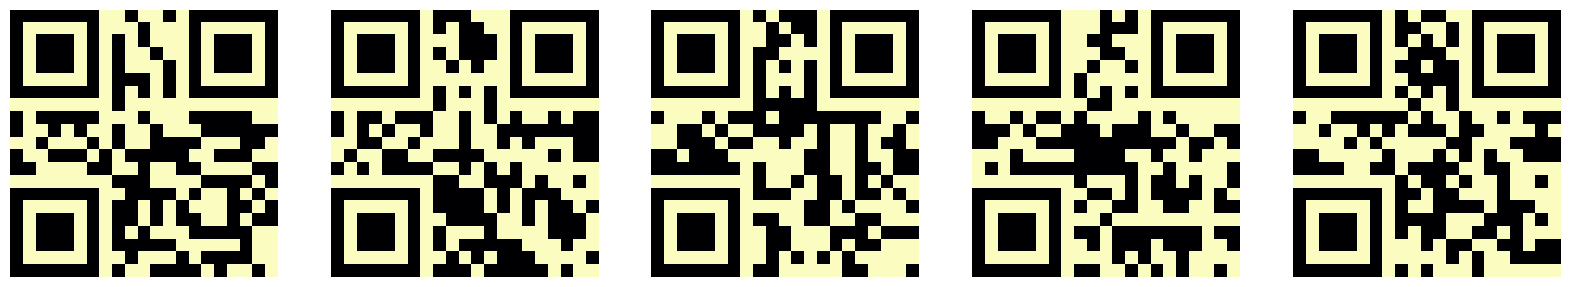

In [216]:
n = 5
X = np.array([create_qr() for i in range(n)])
plot_codes(X)

Создадим 5 изображений, которые притворяются правильными qr-кодами

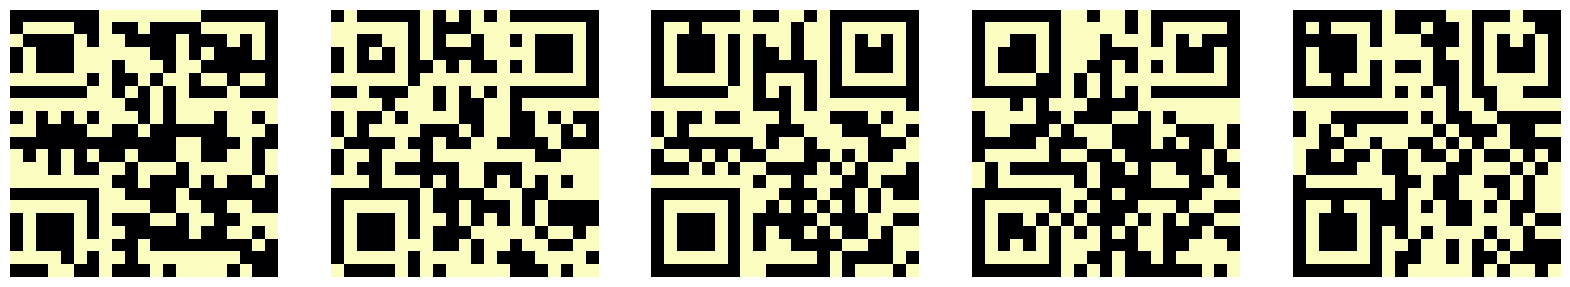

In [217]:
n = 5
X = np.array([crash_code(create_qr(), 0.075) for i in range(n)])
plot_codes(X)

Формируем датасет

In [249]:
n = 10
X = np.array([crash_code(create_qr(), 0.075) for i in range(6)] +
             [[0]*441, [1]*441,
              [random.randint(0, 1) for i in range(441)],
              [random.randint(0, 1) for i in range(441)]] +
              [create_qr() for i in range(n)])
y = np.array([0]*n + [1]*n)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [250]:
X_, y_ = shuffle(X, y)
y_

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

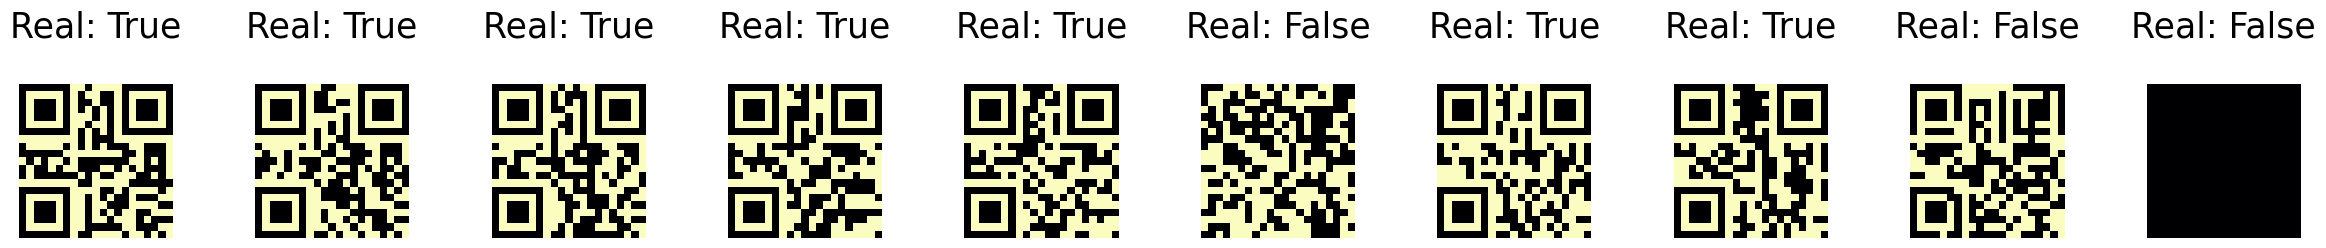

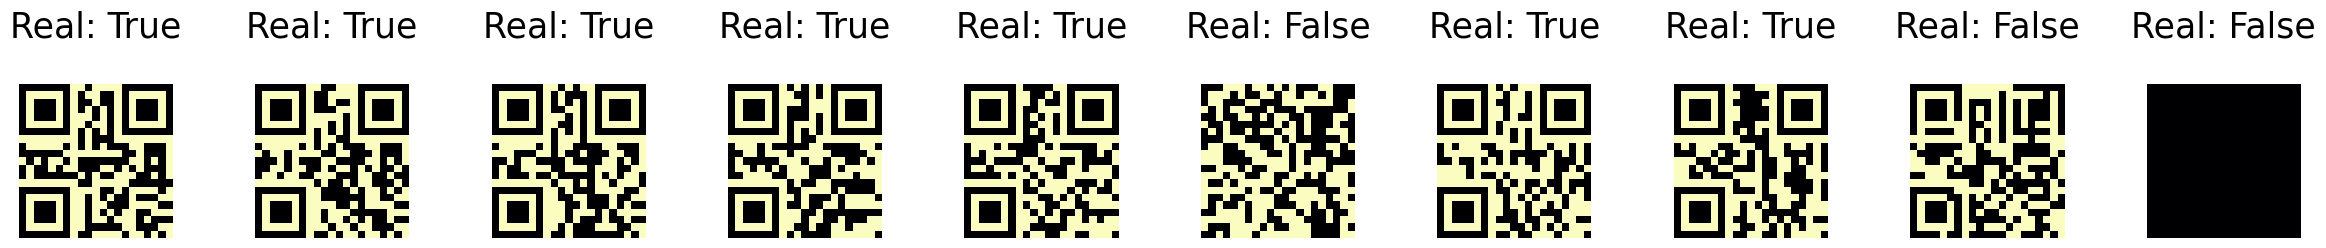

In [251]:
plot_codes(X_[:10, :], y_true=y_[:10])
plot_codes(X_[:-10, :], y_true=y_[:-10])